In [298]:
# Necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

Prepocessing

In [252]:
# Loading the dataset
df = pd.read_csv('Loan-fraud-detection.csv')

EDA

In [254]:
df.shape

(500, 14)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    int64  
 1   Gender             491 non-null    object 
 2   Married            497 non-null    object 
 3   Dependents         488 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      473 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   486 non-null    float64
 10  Credit_History     459 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 54.8+ KB


In [258]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [260]:
#null values in all columns
null_values = df.isnull().sum()
null_values

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [262]:
df.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000,500.000000
mean,1816.642000,5493.644000,1506.307840,144.020747,342.543210,0.843137,6999.951840
std,459.507074,6515.668972,2134.432188,82.344919,63.834977,0.364068,6605.759256
min,1002.000000,150.000000,0.000000,17.000000,12.000000,0.000000,1442.000000
25%,1442.000000,2874.500000,0.000000,100.000000,360.000000,1.000000,4166.000000
50%,1830.000000,3854.000000,1125.500000,126.500000,360.000000,1.000000,5332.500000
75%,2209.500000,5764.000000,2253.250000,161.500000,360.000000,1.000000,7495.250000
max,2602.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,81000.000000


In [266]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0
496,2587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0
497,2588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,7482.0
498,2600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0


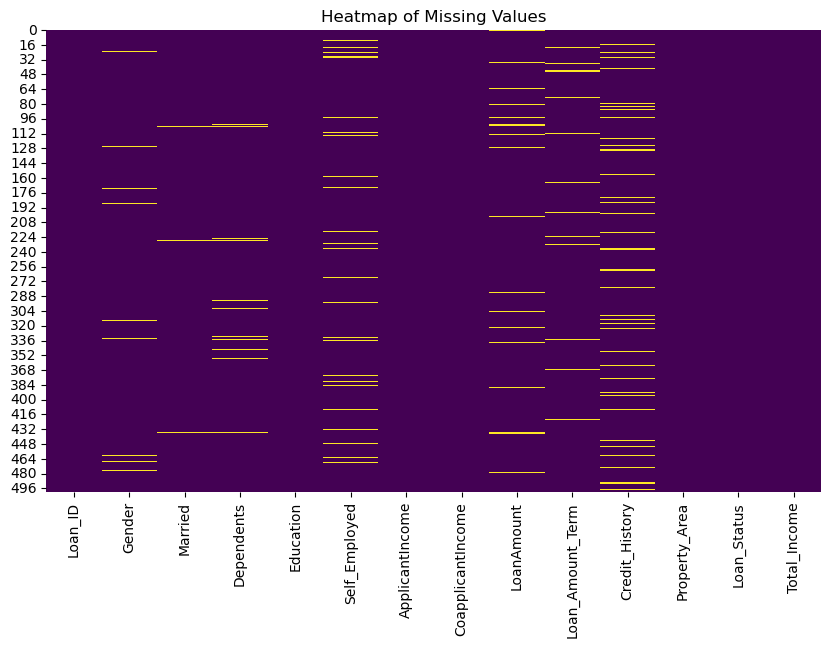

In [270]:
# Visualizing missing values with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [272]:
# Handling missing values for categorical features (Gender, Married, Self_Employed)
# Filling missing values with 'mode'
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Handling missing values in numerical features (LoanAmount, Loan_Amount_Term, Credit_History, Dependents)
# Filling 'LoanAmount' and 'Loan_Amount_Term' with a median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Filling missing values in 'Credit_History' and 'Dependents' with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [274]:
null_values = df.isnull().sum()
null_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

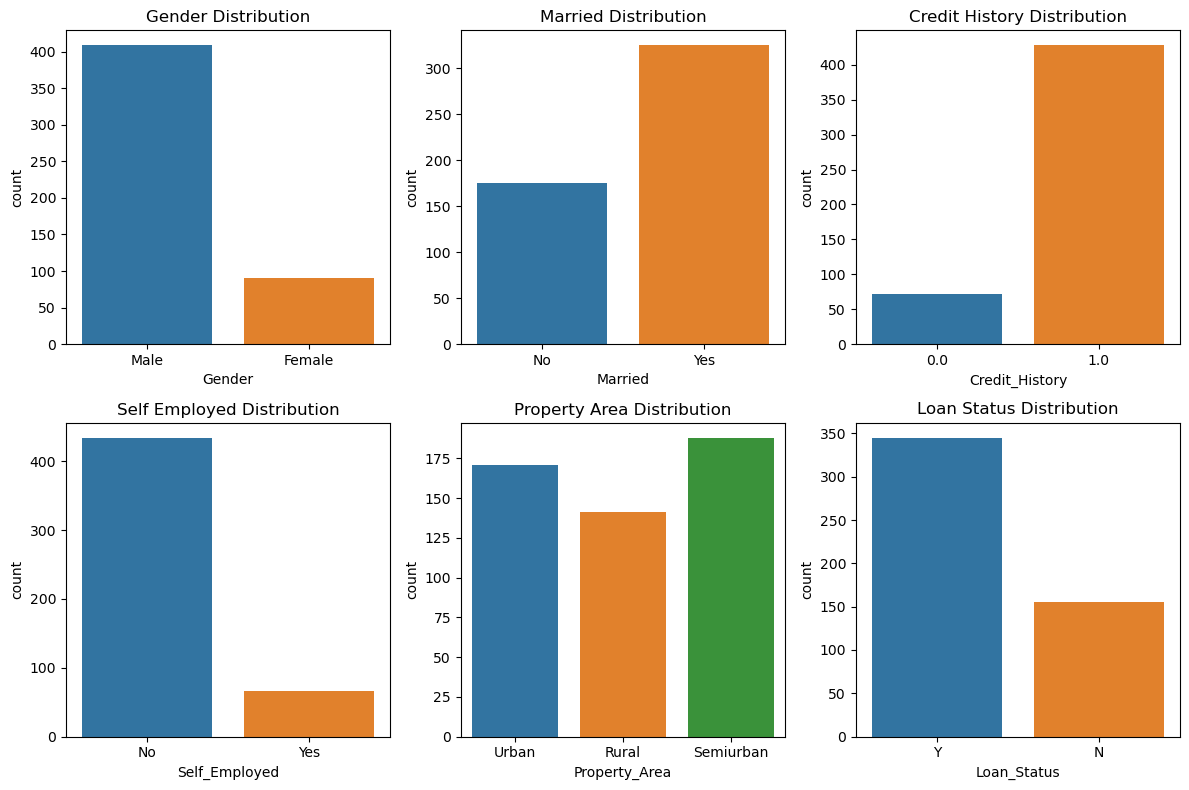

In [276]:
plt.figure(figsize=(12,8))

# Gender Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Married Distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=df)
plt.title('Married Distribution')

# Credit History Distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

# Self Employed Distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=df)
plt.title('Self Employed Distribution')

# Property Area Distribution
plt.subplot(2, 3, 5)
sns.countplot(x='Property_Area', data=df)
plt.title('Property Area Distribution')

# Loan Status Distribution
plt.subplot(2, 3, 6)
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')

plt.tight_layout()
plt.show()

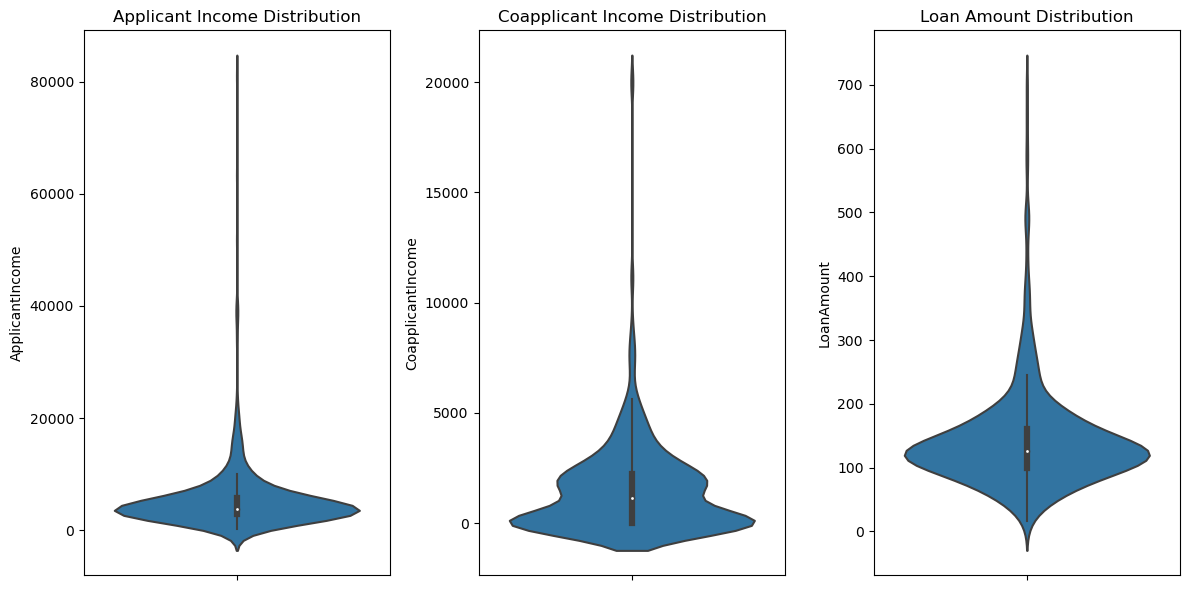

In [277]:
# Analysis of numerical variables using histograms and KDE plots
plt.figure(figsize=(12,6))

# Applicant Income Distribution
plt.subplot(1, 3, 1)
sns.violinplot(y=df['ApplicantIncome'])
plt.title('Applicant Income Distribution')

# Coapplicant Income Distribution
plt.subplot(1, 3, 2)
sns.violinplot(y=df['CoapplicantIncome'])
plt.title('Coapplicant Income Distribution')

# Loan Amount Distribution
plt.subplot(1, 3, 3)
sns.violinplot(y=df['LoanAmount'])
plt.title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

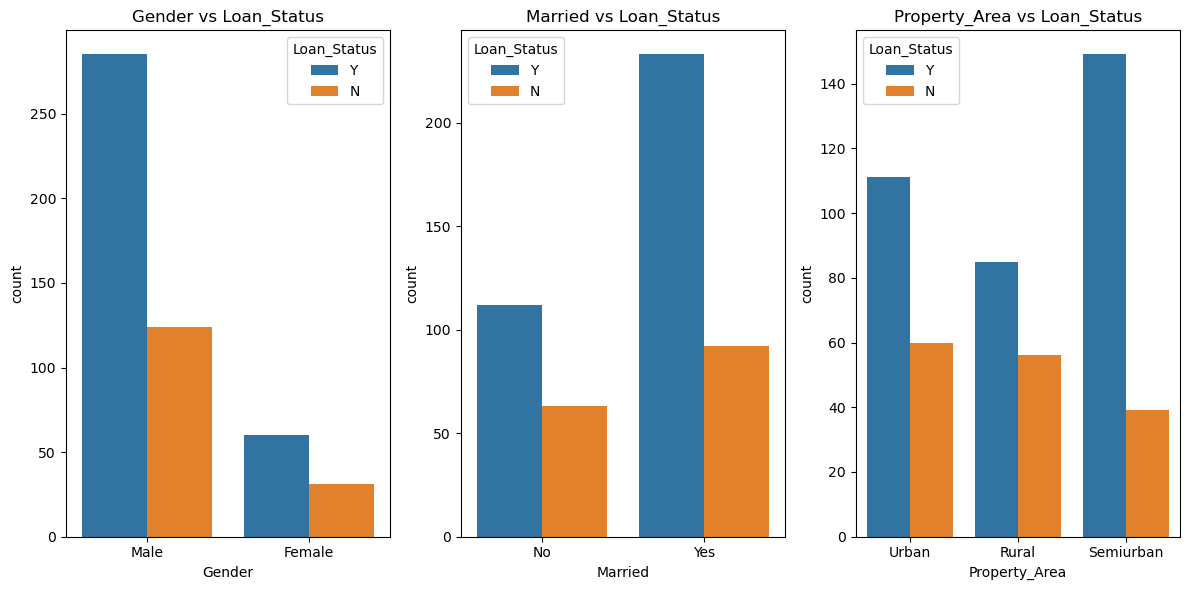

In [280]:
#Categorical variables vs Loan Status
plt.figure(figsize=(12,6))

# Gender vs Loan Status
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs Loan_Status')

# Married vs Loan Status
plt.subplot(1, 3, 2)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Married vs Loan_Status')

# Property Area vs Loan Status
plt.subplot(1, 3, 3)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property_Area vs Loan_Status')

plt.tight_layout()
plt.show()

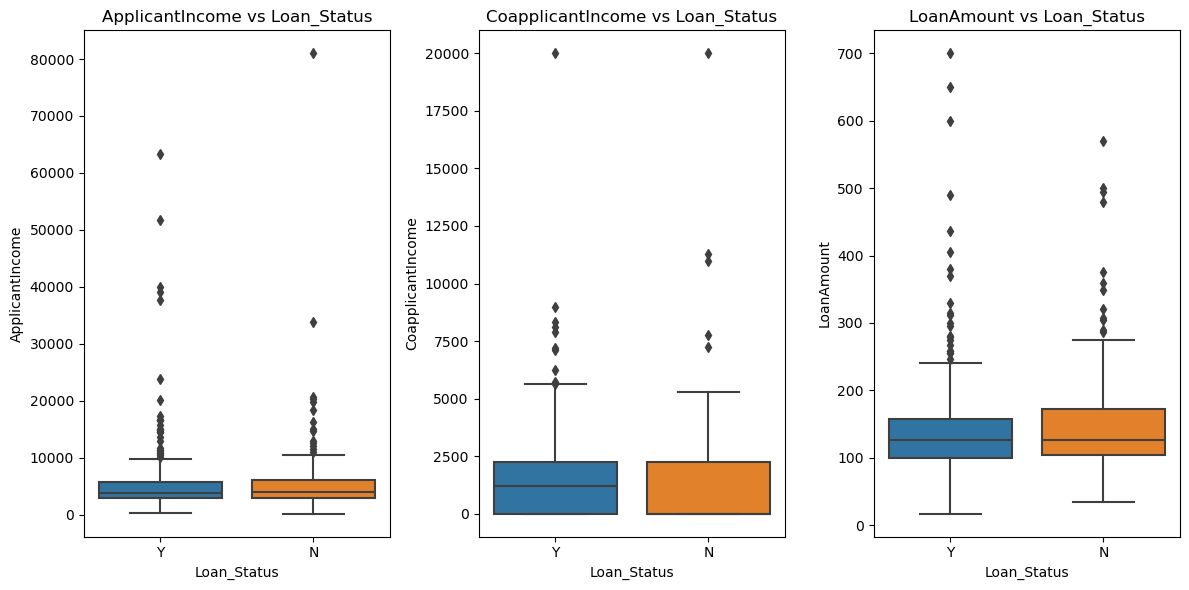

In [282]:
#Numerical variables vs Loan Status
plt.figure(figsize=(12,6))

# Applicant Income vs Loan Status
plt.subplot(1, 3, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome vs Loan_Status')

# Coapplicant Income vs Loan Status
plt.subplot(1, 3, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('CoapplicantIncome vs Loan_Status')

# Loan Amount vs Loan Status
plt.subplot(1, 3, 3)
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('LoanAmount vs Loan_Status')

plt.tight_layout()
plt.show()

In [284]:
# Encoding categorical features using LabelEncoder
label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


Fraud detection based on credit history

In [290]:
# Assuming Credit history = 0 is fraudulent and Credit history = 1 is not
df['fraud_status'] = df['Credit_History'].apply(lambda x: 1 if x == 0 else 0)

In [292]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,fraud_status
0,1002,1,0,0,0,0,5849,0.0,126.5,360.0,1.0,2,1,5849.0,0
1,1003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0
2,1005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,0
3,1006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0
4,1008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2586,0,1,1,0,0,3326,913.0,105.0,84.0,1.0,1,1,4239.0,0
496,2587,1,1,0,1,0,2600,1700.0,107.0,360.0,1.0,0,1,4300.0,0
497,2588,1,1,0,0,0,4625,2857.0,111.0,12.0,1.0,2,1,7482.0,0
498,2600,1,1,1,0,1,2895,0.0,95.0,360.0,1.0,1,1,2895.0,0


In [294]:
# Defining target and features
X = df.drop(columns=['Loan_ID', 'fraud_status', 'Credit_History'])
Y = df['fraud_status']

# Splitting the data into train and test sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
Model Building

In [ ]:
Logistic Regression

In [318]:
# Initializing the Logistic Regression model
logreg = LogisticRegression(max_iter=500)

# Fitting the model on the training data
logreg.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluation metrics
precision_logreg = precision_score(Y_test, y_pred_logreg)
recall_logreg = recall_score(Y_test, y_pred_logreg)
f1_logreg = f1_score(Y_test, y_pred_logreg)

print(f'Logistic Regression - Precision: {precision_logreg:.2f}, Recall: {recall_logreg:.2f}, F1-Score: {f1_logreg:.2f}')

Logistic Regression - Precision: 0.54, Recall: 0.30, F1-Score: 0.39


In [ ]:
Random Forest model

In [314]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=100)

# Fitting the model on the training data
rf.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)

print(f'Random Forest - Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}')

Random Forest - Precision: 0.64, Recall: 0.30, F1-Score: 0.41


In [ ]:
XGBoost Classifier

In [316]:
# Initializing the XGBoost model
xgb = XGBClassifier(random_state=100)

# Fitting the model on the training data
xgb.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluation metrics
precision_xgb = precision_score(Y_test, y_pred_xgb)
recall_xgb = recall_score(Y_test, y_pred_xgb)
f1_xgb = f1_score(Y_test, y_pred_xgb)

print(f'XGBoost - Precision: {precision_xgb:.2f}, Recall: {recall_xgb:.2f}, F1-Score: {f1_xgb:.2f}')

XGBoost - Precision: 0.56, Recall: 0.43, F1-Score: 0.49


In [ ]:
Model evaluation

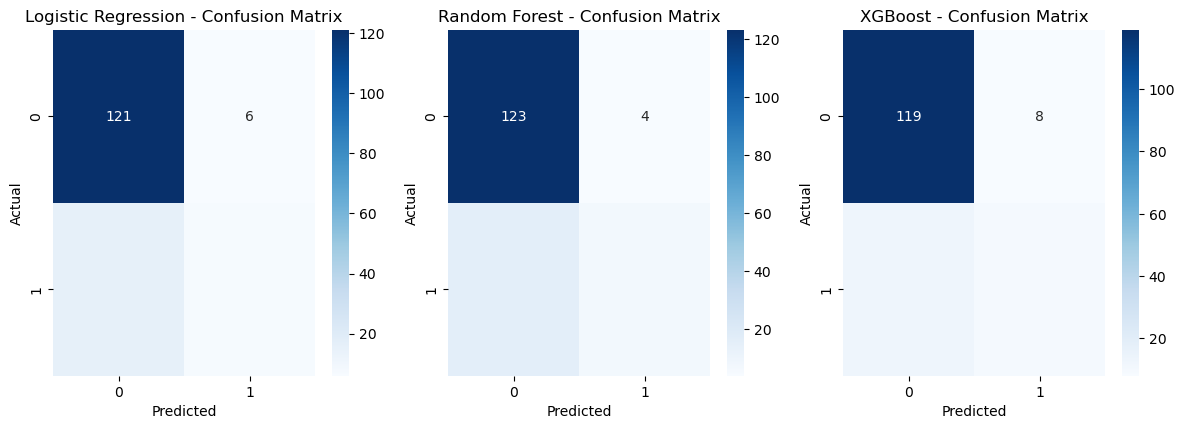

In [312]:
plt.figure(figsize=(12, 8))


# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(Y_test, y_pred_logreg)

# Plotting the confusion matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

# Plotting the confusion matrix
plt.subplot(2, 3, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')

# Confusion Matrix for XGBoost Model
conf_matrix_xgb = confusion_matrix(Y_test, y_pred_xgb)

# Plotting the confusion matrix
plt.subplot(2, 3, 3)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')


plt.tight_layout()
plt.show()